In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
kobe = pd.read_csv('data/kobe_stats.csv', index_col=0)

In [10]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1557
Columns: 645 entries, SHOTS_MADE to CAREER_GAME_NUMBER
dtypes: float64(640), int64(5)
memory usage: 7.7 MB


In [18]:
corr = kobe.corr()
top = corr['SHOTS_MADE'].sort_values(ascending=False)[:11]
scatter_matrix(kobe[top.index])

# all of the above is a way of figuring out the top 10 
# things correlated with shots_made and then visualizing 
# to visually inspect co_linearity.

#it looks like virtually everything is colinear here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002053F7CA438>,
      dtype=object)

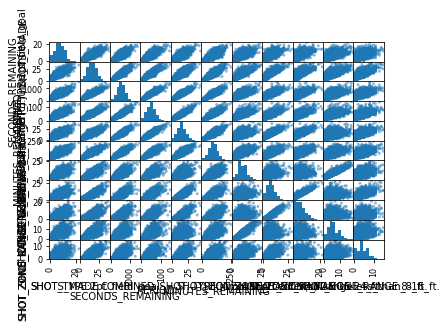

In [6]:
kobe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 646 columns):
Unnamed: 0                                        int64
SHOTS_MADE                                        float64
AWAY_GAME                                         int64
SEASON_OPPONENT:atl:1996-97                       float64
SEASON_OPPONENT:atl:1997-98                       float64
SEASON_OPPONENT:atl:1999-00                       float64
SEASON_OPPONENT:atl:2000-01                       float64
SEASON_OPPONENT:atl:2001-02                       float64
SEASON_OPPONENT:atl:2002-03                       float64
SEASON_OPPONENT:atl:2003-04                       float64
SEASON_OPPONENT:atl:2004-05                       float64
SEASON_OPPONENT:atl:2005-06                       float64
SEASON_OPPONENT:atl:2006-07                       float64
SEASON_OPPONENT:atl:2007-08                       float64
SEASON_OPPONENT:atl:2008-09                       float64
SEASON_OPPONENT:atl:2009-1

# So the prediction problem is to figure out how many shots Kobe makes.  

### But, there are a whole lot of different features, how do we know which ones to use?  And even then, there's likely to be a lot of colinearity--how do we make sure we don't use features that are correlated to each other?

# THERE'S SOMETHING CALLED "PANDAS PROFILING" THAT CAN HELP.  NOW YOU NEED TO FIGURE OUT WHAT THE HELL IT IS AND HOW TO USE IT.

In [4]:
y = kobe.SHOTS_MADE
X = kobe.drop('SHOTS_MADE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Steps that he is having us take to investigate.

1. Implement `LinearRegression()`
2. Evaluate.
3. Implement `Ridge()` model (use `StandardScaler()`) 
4. Evaluate Ridge
5. Implement `Lasso()` model
6. Evaluate
7. Implement `ElasticNet()` model
8. Evaluate
9. `GridSearchCV()` on each of the above 

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = lm.score(X_test, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.4381 
The RMSE value is 2.6108


In [10]:
lasso_pipe = make_pipeline(StandardScaler(), Lasso())
lasso_pipe.fit (X_train, y_train)
predictions = lasso_pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = lasso_pipe.score(X_test, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.5163 
The RMSE value is 2.4222


In [11]:
r_pipe = make_pipeline(StandardScaler(), Ridge())
r_pipe.fit (X_train, y_train)
predictions = r_pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = r_pipe.score(X_test, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.4401 
The RMSE value is 2.6061


In [12]:
e_pipe = make_pipeline(StandardScaler(), ElasticNet())
e_pipe.fit (X_train, y_train)
predictions = e_pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = e_pipe.score(X_test, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.5757 
The RMSE value is 2.2687


In [14]:
l_params = {'lasso__alpha': np.linspace(0.1, 100, 20)}
l_grid = GridSearchCV(lasso_pipe, param_grid=l_params)
l_grid.fit(X_train, y_train)
l_best = l_grid.best_estimator_
predictions = l_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = l_grid.score(X_test, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.6522 
The RMSE value is 2.0541


In [15]:
l_best.named_steps

{'lasso': Lasso(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [16]:
lasso_coef = l_best.named_steps.lasso.coef_

AttributeError: 'dict' object has no attribute 'lasso'

In [ ]:
lasso_feats = X_test.columns[lasso_coef!=0]
lasso_feats

In [42]:
r_params = {'ridge__alpha': [0.1, 1, 4, 10, 100]}
r_grid = GridSearchCV(r_pipe, param_grid=r_params)
r_grid.fit(X_train, y_train)
r_best = r_grid.best_estimator_
predictions = r_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = r_grid.score(X_test, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.4772 
The RMSE value is 2.4112


In [59]:
e_pipe.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])>

In [1]:
e_params = {'elasticnet__alpha': np.linspace(.1, 100, 20),
           'elasticnet__l1_ratio': np.linspace(.01, 1, 20)}
e_grid = GridSearchCV(e_pipe, param_grid = e_params)
e_grid.fit(X_train, y_train)
predictions = e_grid.best_estimator_.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = e_best.score(X_test, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

NameError: name 'np' is not defined